<a href="https://colab.research.google.com/github/genesisoyelaja/Regression-Model-and-LSTM-on-stock-market-data/blob/main/Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

###Standard Libraries for DAta Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

###Sklearn Modules for Data Preprocesssing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Sklearn modules for Model Selection

In [ ]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

###Sklearn modules for Model Evaluation & Improvement

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import RandomizedSearchCV

###Standard libraries for data visualization

In [ ]:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

###Miscellaneous Utilitiy Libraries

In [ ]:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

##Test


In [ ]:
dataset = pd.read_excel("dummy genesis.xlsx")
dataset.head()

,ID No,Division Status,Currently Practicing,Providing Direct Patient Care,Gender Code,Workplace County,Age,CCPS Country,Left
0,72411,Children's Nurses Division,No,No,Male,Laois,48,USA,0
1,319297,Intellectual Disability Nurses Division,Yes,Yes,Female,Dublin,40,New Zealand,0
2,111018,Midwife Tutors Division,Yes,Yes,Male,Roscommon,31,Austrailia,0
3,755937,Midwife Tutors Division,No,No,Female,Laois,31,NaN,0
4,820987,Public Health Nurses Division,No,No,Male,Roscommon,64,UAE,0


In [ ]:
identity = dataset["ID No"]
dataset = dataset.drop(columns="ID No")

In [ ]:
dataset= pd.get_dummies(dataset)

In [ ]:
dataset

,Age,Left,Division Status_Advanced Midwife Practitioners Division,Division Status_Advanced Nurse Practitioners Division,Division Status_Children's Nurses Division,Division Status_General Nurses Division,Division Status_Intellectual Disability Nurses Division,Division Status_Midwife Prescribers Division,Division Status_Midwife Tutors Division,Division Status_Midwives Division,Division Status_Nurse Prescribers Division,Division Status_Nurse Tutors Division,Division Status_Psychiatric Nurses Division,Division Status_Public Health Nurses Division,Currently Practicing_No,Currently Practicing_Yes,Providing Direct Patient Care_No,Providing Direct Patient Care_Yes,Gender Code_Female,Gender Code_Genesis,Gender Code_Male,Workplace County_Carlow,Workplace County_Cavan,Workplace County_Clare,Workplace County_Cork,Workplace County_Donegal,Workplace County_Dublin,Workplace County_Galway,Workplace County_Kerry,Workplace County_Kildare,Workplace County_Kilkenny,Workplace County_Laois,Workplace County_Leitrim,Workplace County_Limerick,Workplace County_Longford,Workplace County_Louth,Workplace County_Mayo,Workplace County_Meath,Workplace County_Monaghan,Workplace County_Offaly,Workplace County_Roscommon,Workplace County_Sligo,Workplace County_Tipperary,Workplace County_Waterford,Workplace County_Westmeath,Workplace County_Wexford,Workplace County_Wicklow,CCPS Country _Austrailia,CCPS Country _New Zealand,CCPS Country _UAE,CCPS Country _USA
0,48,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,31,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,31,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,64,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,42,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1628,38,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1629,28,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1630,31,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
dataset = pd.concat([dataset, identity], axis = 1)
dataset.head(5)

,Age,Left,Division Status_Advanced Midwife Practitioners Division,Division Status_Advanced Nurse Practitioners Division,Division Status_Children's Nurses Division,Division Status_General Nurses Division,Division Status_Intellectual Disability Nurses Division,Division Status_Midwife Prescribers Division,Division Status_Midwife Tutors Division,Division Status_Midwives Division,Division Status_Nurse Prescribers Division,Division Status_Nurse Tutors Division,Division Status_Psychiatric Nurses Division,Division Status_Public Health Nurses Division,Currently Practicing_No,Currently Practicing_Yes,Providing Direct Patient Care_No,Providing Direct Patient Care_Yes,Gender Code_Female,Gender Code_Genesis,Gender Code_Male,Workplace County_Carlow,Workplace County_Cavan,Workplace County_Clare,Workplace County_Cork,Workplace County_Donegal,Workplace County_Dublin,Workplace County_Galway,Workplace County_Kerry,Workplace County_Kildare,Workplace County_Kilkenny,Workplace County_Laois,Workplace County_Leitrim,Workplace County_Limerick,Workplace County_Longford,Workplace County_Louth,Workplace County_Mayo,Workplace County_Meath,Workplace County_Monaghan,Workplace County_Offaly,Workplace County_Roscommon,Workplace County_Sligo,Workplace County_Tipperary,Workplace County_Waterford,Workplace County_Westmeath,Workplace County_Wexford,Workplace County_Wicklow,CCPS Country _Austrailia,CCPS Country _New Zealand,CCPS Country _UAE,CCPS Country _USA,ID No
0,48,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,72411
1,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,319297
2,31,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,111018
3,31,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,755937
4,64,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,820987


In [ ]:
response = dataset['Left']
dataset = dataset.drop(columns='Left')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1305, 51)
Number transactions y_train dataset:  (1305,)
Number transactions X_test dataset:  (327, 51)
Number transactions y_test dataset:  (327,)


In [ ]:
train_identity = X_train['ID No']
X_train = X_train.drop(columns = ['ID No'])
test_identity = X_test['ID No']
X_test = X_test.drop(columns = ['ID No'])

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

##Modelling

###Import Models

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

###Evaluate Model Results

In [ ]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD','Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0,shuffle=True)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_auc_results.std()*100, 2),round(cv_acc_results.mean()*100, 2),round(cv_acc_results.std()*100, 2)]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,51.78,6.70,85.66,4.31
2,Kernel SVM,50.43,5.65,86.04,4.38
0,Logistic Regression,49.89,9.09,53.26,3.88
3,KNN,49.71,5.32,84.06,3.96
5,Decision Tree Classifier,49.65,4.40,76.01,4.92
4,Gaussian NB,45.27,7.68,55.70,4.54
1,SVC,43.28,6.09,86.04,4.38


###Optimal Number of K Neighbors

(array([0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88]),
 [Text(0, 0.74, '0.74'),
  Text(0, 0.76, '0.76'),
  Text(0, 0.78, '0.78'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.82, '0.82'),
  Text(0, 0.84, '0.84'),
  Text(0, 0.86, '0.86'),
  Text(0, 0.88, '0.88')])

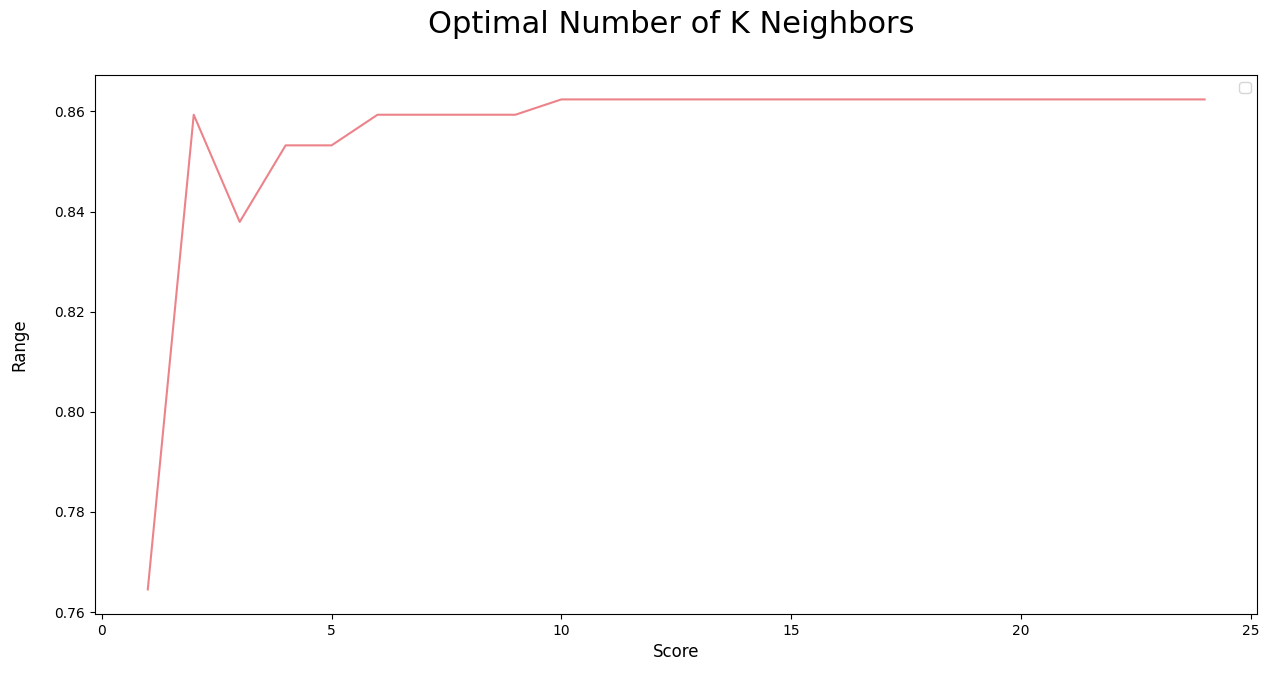

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Optimal Number of Trees for Random Forest Model

(array([0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88]),
 [Text(0, 0.74, '0.74'),
  Text(0, 0.76, '0.76'),
  Text(0, 0.78, '0.78'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.82, '0.82'),
  Text(0, 0.84, '0.84'),
  Text(0, 0.86, '0.86'),
  Text(0, 0.88, '0.88')])

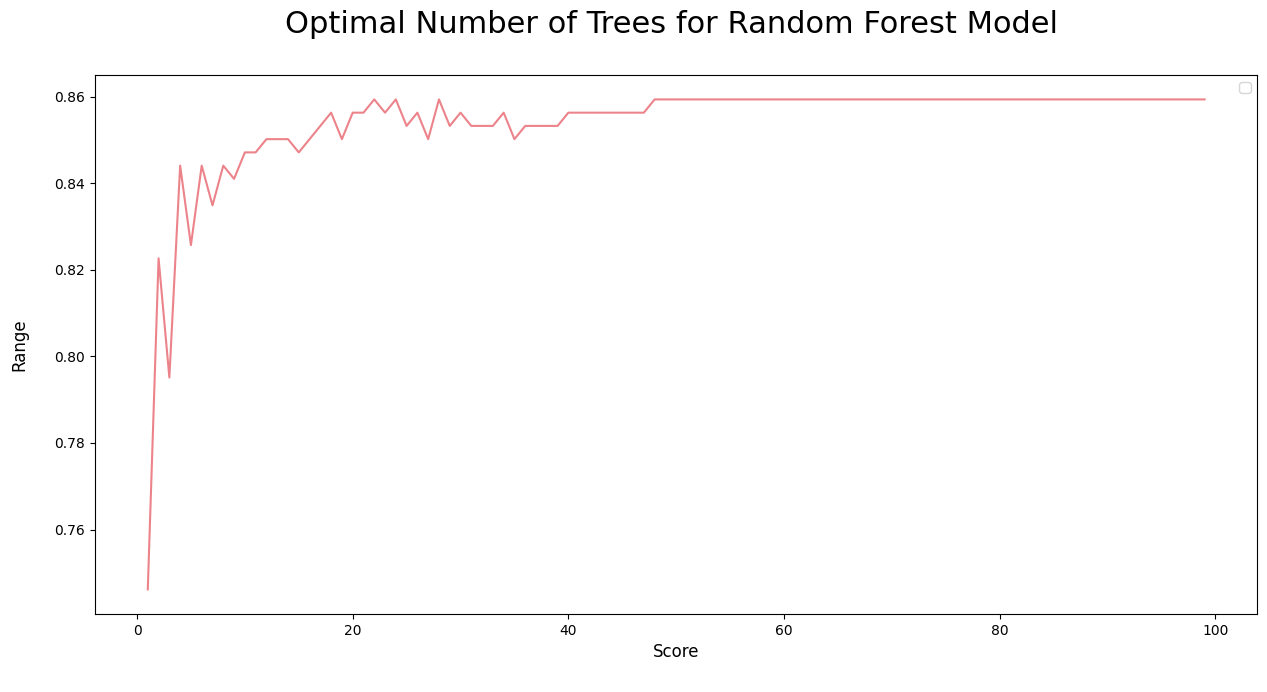

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Fitting Logistic Regression to the Training set

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]], columns = ['Model',
'Accuracy', 'Precision', 'Recall', 'F1 Score',
'F2 Score'])
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression  0.862385        0.0     0.0       0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Fitting SVM (SVC class) to the Training set

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression  0.862385        0.0     0.0       0.0       0.0
1         SVM (Linear)  0.862385        0.0     0.0       0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-37-4ddca45560e1>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###Fitting KNN to the Training set:

In [ ]:
classifier = KNeighborsClassifier(
n_neighbors = 8,
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours',
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0   Logistic Regression  0.862385        0.0     0.0       0.0       0.0
1          SVM (Linear)  0.862385        0.0     0.0       0.0       0.0
2  K-Nearest Neighbours  0.859327        0.0     0.0       0.0       0.0


<ipython-input-38-ab8e15f1b027>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###Fitting Naive Byes to the Training set

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision  Recall  F1 Score  F2 Score
3            Naive Byes  0.587156   0.142857     0.4  0.210526  0.294118
0   Logistic Regression  0.862385   0.000000     0.0  0.000000  0.000000
1          SVM (Linear)  0.862385   0.000000     0.0  0.000000  0.000000
2  K-Nearest Neighbours  0.859327   0.000000     0.0  0.000000  0.000000


<ipython-input-39-ad146bf1d76e>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###Fitting Decision Tree to the Training set

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0            Naive Byes  0.587156   0.142857     0.4  0.210526  0.294118
4         Decision Tree  0.703364   0.128571     0.2  0.156522  0.180000
1   Logistic Regression  0.862385   0.000000     0.0  0.000000  0.000000
2          SVM (Linear)  0.862385   0.000000     0.0  0.000000  0.000000
3  K-Nearest Neighbours  0.859327   0.000000     0.0  0.000000  0.000000


<ipython-input-40-35921fb21dee>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###Fitting Random Forest to the Training set

In [ ]:
classifier = RandomForestClassifier(n_estimators = 45,
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Random Forest', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Accuracy","Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision  Recall  F1 Score  F2 Score
2   Logistic Regression  0.862385   0.000000     0.0  0.000000  0.000000
3          SVM (Linear)  0.862385   0.000000     0.0  0.000000  0.000000
4  K-Nearest Neighbours  0.859327   0.000000     0.0  0.000000  0.000000
5         Random Forest  0.853211   0.000000     0.0  0.000000  0.000000
1         Decision Tree  0.703364   0.128571     0.2  0.156522  0.180000
0            Naive Byes  0.587156   0.142857     0.4  0.210526  0.294118


<ipython-input-41-caa24387fcc5>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


###TOP MODEL

In [ ]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.86 (+/- 0.02)


###Prediction Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

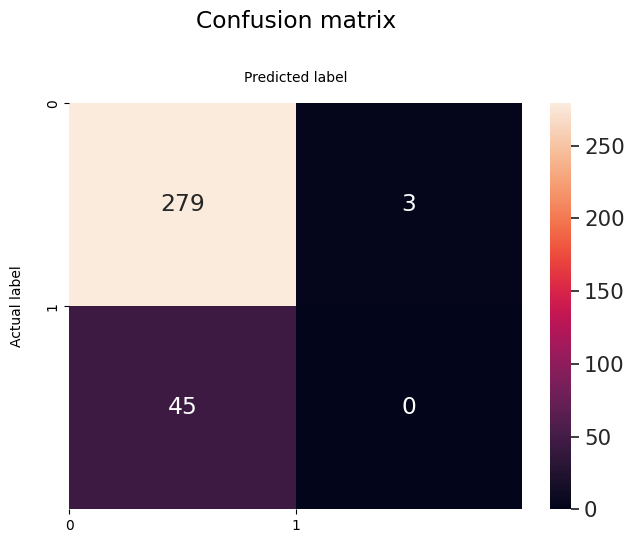

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

###Plot Randomforest  ROC

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

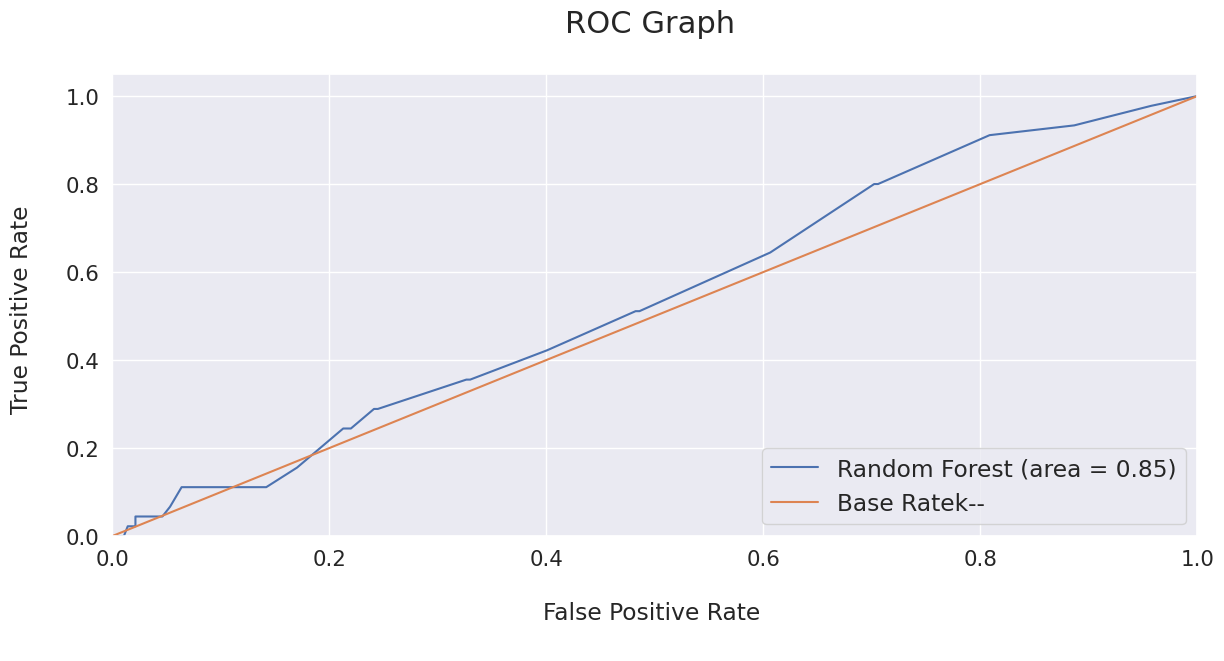

In [ ]:
classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Randomforest  ROC
plt.plot(rf_fpr, rf_tpr,
label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium",
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium",
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "22",
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Analyzing Coefficients

In [ ]:
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'ID No').columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.feature_importances_),
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
0,Age,0.210268
19,Gender Code_Male,0.032424
18,Gender Code_Genesis,0.029380
17,Gender Code_Female,0.029252
49,CCPS Country _USA,0.028804
47,CCPS Country _New Zealand,0.028338
48,CCPS Country _UAE,0.026866
46,CCPS Country _Austrailia,0.026384
8,Division Status_Midwives Division,0.020180
14,Currently Practicing_Yes,0.019626


###Prepare to Optimize Model

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


###Optimizing The Model

In [ ]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    some = np.nan_to_num((errors / y_test),nan=np.nan, posinf=np.nan)
    mape = 100 *  np.nanmean(some)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model Performance
Average Error: 0.1437 degrees.
Accuracy = 0.00%.
Model Performance
Average Error: 0.1376 degrees.
Accuracy = 0.00%.
Improvement of nan%.


<ipython-input-50-c6415926b149>:25: RuntimeWarning: invalid value encountered in scalar divide
  print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


###probability score

In [ ]:
y_pred_probs = best_random.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
y_pred_new = best_random.predict(X_test)

###Revalidate final results with Confusion Matrix

[[279   3]
 [ 45   0]]
Test Data Accuracy: 0.8532


<Figure size 2800x2000 with 0 Axes>

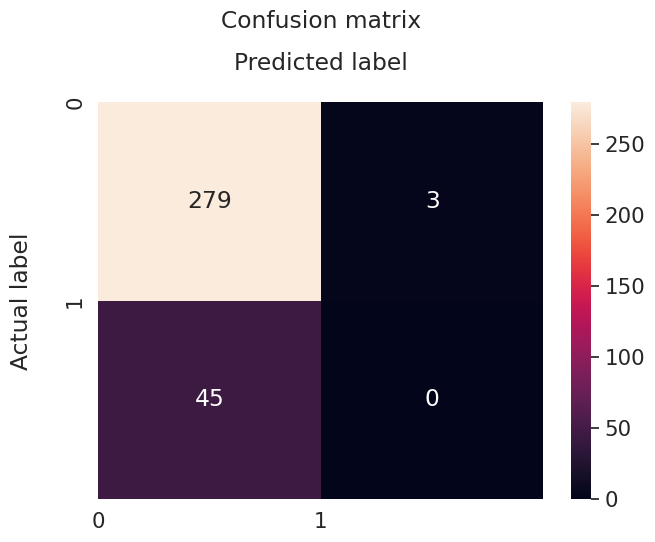

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
#Confusion Matrix as a quick Crosstab:
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

##FINAL Results

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results['new_pred']= y_pred_new
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
final_results

,ID No,Left,predictions,new_pred,propensity_to_churn(%),Ranking
67,461962,0,0,0,13.79,6
429,870234,0,0,0,15.55,4
1171,108667,0,0,0,14.75,5
33,925140,0,0,0,15.25,4
623,119148,0,0,0,17.67,3
...,...,...,...,...,...,...
645,456330,0,0,0,8.81,9
370,23961,0,0,0,28.43,1
377,72530,0,0,0,10.07,8
1117,432801,0,0,0,25.70,1


#### Random Forest Tree

In [ ]:
from sklearn.tree import export_graphviz
estimator = best_random.estimators_[5]


In [ ]:
export_graphviz(estimator,out_file='new_tt_tree.dot', max_depth = 3,feature_names = dataset.drop(columns = 'ID No').columns,class_names = 'Attrited_Customers',rounded = True, proportion = False, precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'new_tt_tree.dot', '-o', 'new_tt_tree.jpg', '-Gdpi=600'])

0

In [ ]:
from IPython.display import Image
Image(filename = 'new_tt_tree.jpg')